In [1]:
import pandas as pd
import numpy as np
import sklearn


In [2]:
df=pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.shape


(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [6]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature_columns].values
y = df['Outcome'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

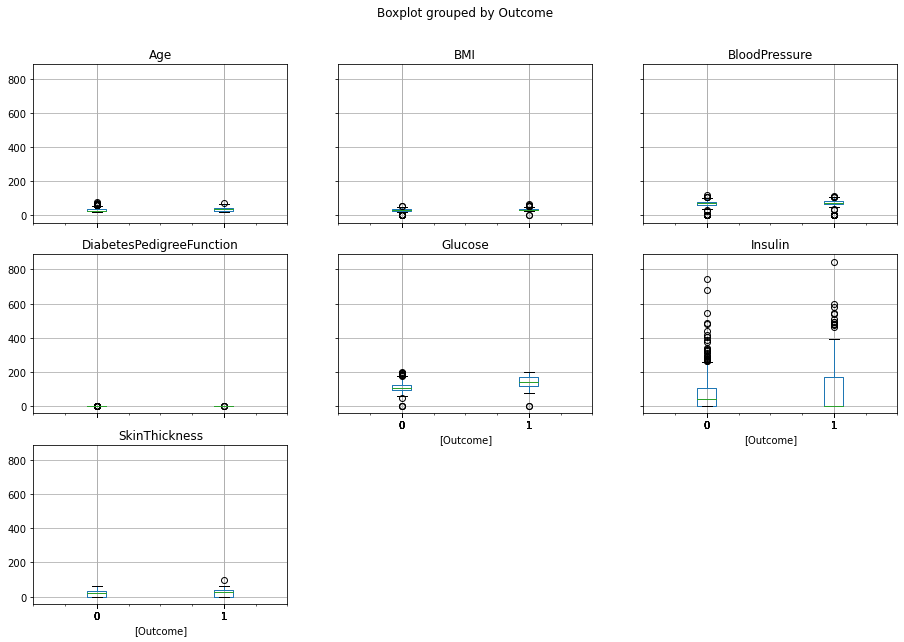

In [9]:
plt.figure()
df.drop("Pregnancies", axis=1).boxplot(by="Outcome", figsize=(15, 10))
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 5)
classifier = KNeighborsClassifier(n_neighbors=6)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [21, 26]], dtype=int64)

In [12]:
accuracy= accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 77.92 %.


In [13]:
#'Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'
x0=float(input("PREGNANCIES between 0-17: "))
x1=float(input("GLUCOSE between 0-199:"))
x2=float(input("BloodPressure between 0-122: "))
x3=float(input("SkinThickness between 0-99: "))
x4=float(input("Insulin level 0-845: "))
x5=float(input("BMI between 0-66: "))
x6=float(input("DiabetesPedigreeFunction between 0.0-2.4: "))
x7=float(input("Your Age between 21-81: "))
predicted_class= classifier.predict([[x0,x1,x2,x3,x4,x5,x6,x7]])#x1,x2,x3,x4 are the different values entered by users for the features

if predicted_class==0:
    print("...No diabetes...")
elif predicted_class==1:
     print("...Diabetes...")

else:
    print("...Class out of Range...")

PREGNANCIES between 0-17: 0
GLUCOSE between 0-199:100
BloodPressure between 0-122: 100
SkinThickness between 0-99: 88
Insulin level 0-845: 800
BMI between 0-66: 65
DiabetesPedigreeFunction between 0.0-2.4: 2.0
Your Age between 21-81: 40
...No diabetes...
